In [118]:
import numpy as np


class Grafo():
    
    def __init__(self,oriented=True,n_nodes=5):
        self.nodes=[]
        self.edges=[]
        self.adj_matrix=np.ones((n_nodes,n_nodes))*400
        self.oriented=oriented
        self.INF=400
        #self.adj_matrix=np.nan

    def addNode(self,node):
        self.nodes.append(node)
    
    def addNodes(self,list_nodes):
        [self.nodes.append(el) for el in list_nodes]
    
        
    def addEdge(self,edge):
        self.edges.append(edge)
        a,b,w=edge
        try:
            i=self.nodes.index(a)
        except:
            i=-1
        try:
            j=self.nodes.index(b)
        except:
            j=-1
        if( i!=-1 and j!=-1):
            self.adj_matrix[i][j]=w
            self.adj_matrix[i][i]=0
            self.adj_matrix[j][j]=0
            
            if self.oriented==False:
                self.adj_matrix[j][i]=w
        
        
    def printAdjMatrix(self):
        print(self.adj_matrix)
    
    def printNodes(self):
        print(self.nodes)
    
    def printEdges(self):
        print(self.edges)
    
    def MST_Kruskal(self):
        #self.printEdges()
        self.edges.sort(key=AscendingOrder)
        self.printEdges()
        
        sets=[]
        for vertex in self.nodes:
            sets.append(Set(vertex))
        
        A=Set()
        for u,v,w in self.edges:
            print(u,v,w)
            
            
            set_u=findSet(sets,u)
            set_v=findSet(sets,v)
            
            #print("Set u",set_u," Set v",set_v)
            #print("Set el(u)",set_u.elRappresentante()," Set el(v)",set_v.elRappresentante())
            
            if (set_u.elRappresentante()!=set_v.elRappresentante()):
                A.addElement((u,v))
                set_u.Union(set_v,sets)
                #sets.remove(set_v)
                
        A.printTuple()

    
    
    def MST_Prim(self,source):
        INF=400
        print("Source -> ",source)
        A=Set()
        Q=dict()
        for vertex in self.nodes:
            Q[vertex]={'key':INF,'parent':None}
        #parto dal nodo 0
        Q[source]['key']=0
        print(len(Q))
        #Q.pop(source)
        #print(Q)
        while(len(Q)!=0):
            u,u_item=self.min_key_value(Q) #
            print("u",u)
            print("u",u_item)
            print("types",type(u),type(u_item))
            if u_item['parent']!=None:
                A.addElement((u,u_item['parent']))

            for a,b,w in self.edges:
                if (a==u):
                    if b in Q.keys():
                        v,v_item=self.search_key_value(Q,b)
                        if (w<v_item['key']):
                            v_item['key']=w
                            v_item['parent']=u
                elif (b==u):
                    if a in Q.keys():
                        v,v_item=self.search_key_value(Q,a)
                        if (w<v_item['key']):
                            v_item['key']=w
                            v_item['parent']=u
                            
        print(Q)
        A.printTuple()
        
        
                    
    def search_key_value(self,Q,b):
        for vertex in Q:
            if vertex == b:
                return vertex,Q[vertex]
    
    def min_key_value(self,Q):
        min_value=400
        source_value=""
        for vertex in Q.keys():
            print("Nodo:",vertex,":",Q[vertex])
            if min_value>Q[vertex]['key']:
                min_value=Q[vertex]['key']
                source_value=vertex
        #print(min_value,source_value)
        u=source_value
        u_item=Q[u]
        Q.pop(source_value)
        return u,u_item
    
    
    
    def Bellman_Ford(self,source):
        ##Inizialize Single Source
        distance_esteemed={}
        predecessor_esteemed={}
        
        for vertex in self.nodes:
            distance_esteemed[vertex]=self.INF
            predecessor_esteemed[vertex]=None
        
        distance_esteemed[source]=0
        
        for vertex in self.nodes:
            for edge in self.edges:
                self.relax(edge,distance_esteemed,predecessor_esteemed)
        
        for edge in self.edges:
            u,v,w=edge
            if distance_esteemed[v]> distance_esteemed[u] + w:
                print("CICLO NEGATIVO")
        print(distance_esteemed)
        print(predecessor_esteemed)
        print("path da {0} a {1}".format(source,'t'))
        print(self.print_path('z',predecessor_esteemed))

        
        
    def print_path(self,dest,p):
        
        if dest==None:
            return ""
        return self.print_path(p[dest],p)+ "->"+str(dest)
        

        
    
    def relax(self,edge,d,p):
        u,v,w=edge
        
        if d[v] > d[u] +w :
            d[v]=d[u]+w
            p[v]=u
        
        
        
    def Floyd_Warshall(self):
        
        INF=400
        
        n=self.adj_matrix.shape[0]
        D_matrix=np.ones((2,n,n))*INF
        D_matrix[0]=self.adj_matrix.copy()
        
        print(D_matrix[0])
        
        for k in range(n):
            for i in range(n):
                for j in range(n):
                    D_matrix[(k+1) % 2][i][j]=min(D_matrix[k%2][i][j],D_matrix[k%2][i][k]+D_matrix[k%2][k][j])
            print("Fine iterazione:",k)
            
        
        print(D_matrix)
        
        
        
        
        
def LenValue(set_):
    return len(set_)
        
def findSet(sets,u):
    #sets.sort(key=LenValue)
    for set_ in sets:
        if (set_.containElement(u)):
            return set_
   
def AscendingOrder(terna):
    a,b,w=terna
    return w
        
class Set():
    
    
    
    
    
    def __len__(self):
        return len(self.lists)
    
    def __init__(self,element=None):
        if element is None:
            self.lists=[]
        else:
            self.lists=[element]
        
    def addElement(self,element):
        self.lists.append(element)
    
    def containElement(self,element):
        if element in self.lists:
            return True
        return False
    
       
    def printTuple(self):
        for i,j in self.lists:
            print("({0},{1})".format(i,j))
    
    def Union(self,Another_set,sets):
        
        self.lists=Another_set.lists+self.lists
        sets.remove(Another_set)
       
    
    def printSet(self):
        print(self.lists)
    
    def getItem(self,index):
        list_=[]
        for item in self.lists:
            list_.append(item[index])
        
        return list_
        
    def elRappresentante(self):
        return self.lists[0]
    
    
    def __str__(self):
        response="{"
        for el in self.lists:
            response+=el+","
        return response+"}"
        
grafo=Grafo(oriented=True)
grafo.addNode('s')
grafo.addNode('t')
grafo.addNode('y')
grafo.addNode('x')
grafo.addNode('z')

grafo.addEdge(('s','t',6))
grafo.addEdge(('s','y',7))
grafo.addEdge(('t','x',5))
grafo.addEdge(('t','y',8))
grafo.addEdge(('t','z',-4))
grafo.addEdge(('y','x',-3))
grafo.addEdge(('z','s',2))
grafo.addEdge(('z','x',7))
grafo.addEdge(('x','t',-2))



grafo.printAdjMatrix()


#grafo.printEdges()
#grafo.MST_Kruskal()
#grafo.MST_Prim('a')
#grafo.Floyd_Warshall()
grafo.Bellman_Ford('s')


[[  0.   6.   7. 400. 400.]
 [400.   0.   8.   5.  -4.]
 [400. 400.   0.  -3. 400.]
 [400.  -2. 400.   0. 400.]
 [  2. 400. 400.   7.   0.]]
{'s': 0, 't': 2, 'y': 7, 'x': 4, 'z': -2}
{'s': None, 't': 'x', 'y': 's', 'x': 'y', 'z': 't'}
path da s a t
->s->y->x->t->z


(45, 2)


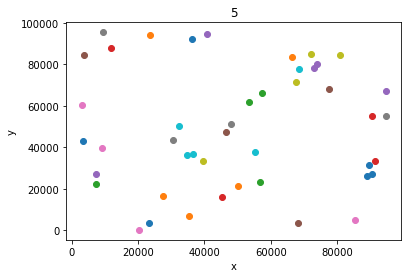

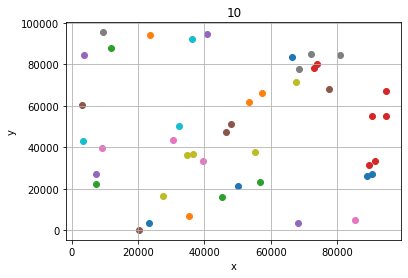

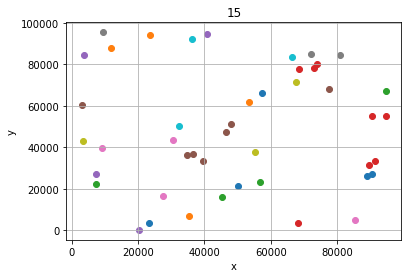

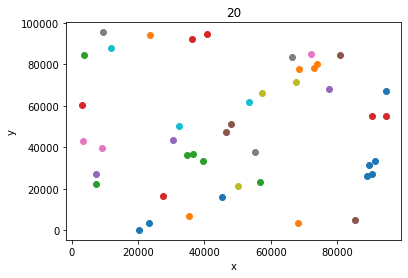

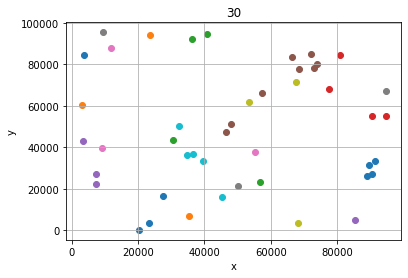

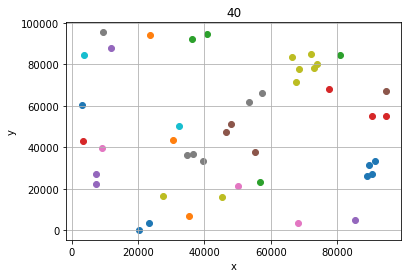

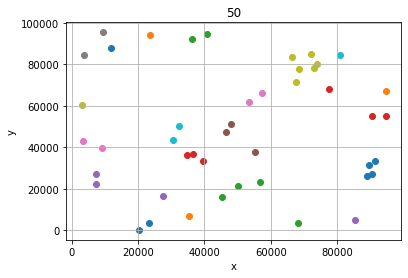

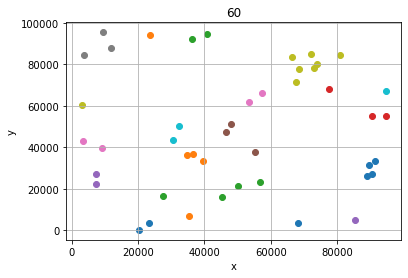

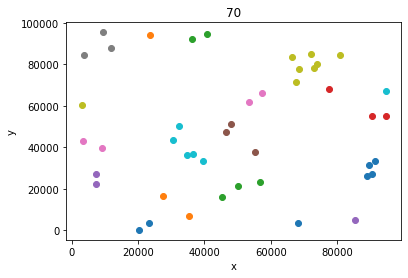

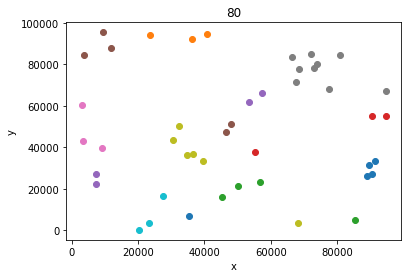

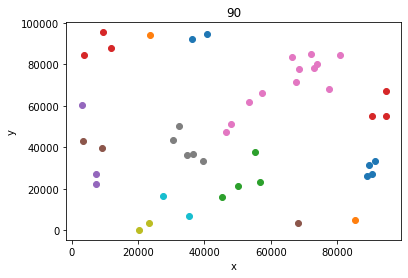

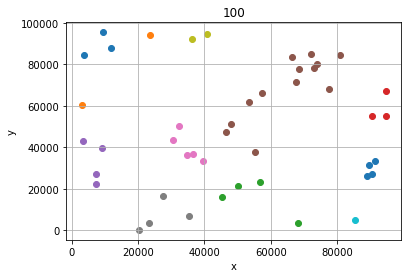

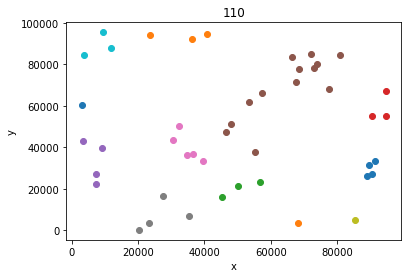

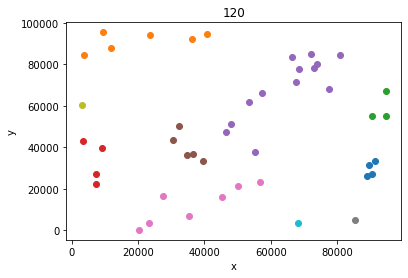

Finito


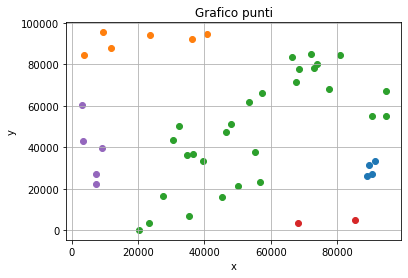

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import time


class K_Clustering:
    def __init__(self,K,points,distance_function):
        
        self.K=K
        self.points=points
        self.edge=[]
        self.distance_function=distance_function
        
    def printListPoint(self):
        print("{")
        for i in range(len(self.points)):
            print(points[i])
        print("}")
    
    def K_Cluster(self):
        ##Costruisco il grafo completo G su U (list_point) secondo la funzione (distance_function)
        G=np.zeros((self.points.shape[0],self.points.shape[0]),dtype='float32')
        for i in range(G.shape[0]):
            for j in range(G.shape[1]):
                #print("Confronto tra ",self.points[i],self.points[j])
                if i>=j or i<=j:
                    G[i][j]=self.distance_function(self.points[i],self.points[j])
                    self.edge.append((i,j,G[i][j]))
        
        self.edge.sort(key=AscendingOrder)
        sets=[]
        time_slice=[5,10,15,20,30,40,50,60,70,80,90,100,110,120]
        counter=0
        cluster=len(self.points)
        
        for point in self.points:
            sets.append(Set(list(point)))
        
        for single_egde in self.edge:
                
            if single_egde[-1]==0.0:
                continue
            if cluster<=self.K:
                break
                
            #for set_ in sets:
            #        set_.printSet()
            #print("Punti :",points[single_egde[0]]  ," ", points[single_egde[1]])
            
            u=findSet(sets,list(points[single_egde[0]]))
            v=findSet(sets,list(points[single_egde[1]]))
            
            if(u.elRappresentante() != v.elRappresentante()):
                u.Union(v,sets)
                cluster-=1
            if counter in time_slice:
                for set_ in sets:
                    x=set_.getItem(0)
                    y=set_.getItem(1)
                    
                    plt.xlabel("x")
                    plt.ylabel("y")
                    plt.title(str(counter))
                    plt.scatter(x,y)
                    plt.grid()
                   
                plt.show()
            counter+=1
                
            
        print("Finito")
       
        for set_ in sets:
            x=set_.getItem(0)
            y=set_.getItem(1)
            #print(x[:5])
            #print(y[:5])
            #axs[plot_c].set_xlim([0,5000])
            plt.grid()
            plt.xlabel("x")
            plt.ylabel("y")
            plt.title("Grafico punti")
            
            plt.scatter(x,y)
        plt.show()
        
            

        
        
        
    
#points=np.array([[1,2],[3,1],[4,6],[5,1],[3,3]])

points=np.zeros((45,2))
for i in range(points.shape[0]):
    for j in range(points.shape[1]):
        points[i][j]=np.random.randint(0,100000)
        

print(points.shape)

def print_plot_test(points):
    x=points[:,0]
    y=points[:,1]
    print(x,y)
    plt.grid()
    plt.scatter(x,y)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Grafico punti")
#print_plot_test(points)

distance_f=lambda x,y:  (np.sum((x-y)**2))**0.5


cluster=K_Clustering(5,points,distance_f)
        
        
#cluster.printListPoint() 
cluster.K_Cluster()        




        
        
        
        
        
        
        
        
        
        
        

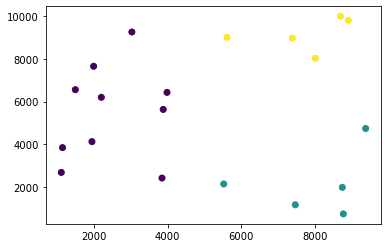

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(points)
plt.scatter(points[:,0],points[:,1],c=kmeans.predict(points))
